# Libraries and Dataset overview

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Creating dataframe and viewing it

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

***

# Cleaning the dataset

- ### Remove columns having null values

In [5]:
# Checking the percentage of null values in columns

nullColsPercent = ((df.isnull().sum())/len(df))*100

In [6]:
# Displaying the unique values of the null percentages

nullColsPercent.value_counts()

100.000000    54
0.000000      43
0.140998       2
6.191303       1
2.706650       1
32.580507      1
0.027696       1
64.662487      1
92.985372      1
0.125891       1
0.178765       1
97.129693      1
0.005036       1
1.754916       1
0.098195       1
dtype: int64

In [7]:
# There are columns which have 100percent null values so removing them

# Getting list of columns names which has only null values
nullColsList = nullColsPercent[nullColsPercent == 100]
nullColsList = nullColsList.index
nullColsList = list(nullColsList)

# Removing these columns
df = df.drop(nullColsList, axis=1)

- ### Count Number of Unique values in each column

In [8]:
uniqueColsValues = df.nunique()
uniqueColsValues

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are several columns which are having single value in all the rows So they wont be of any use for the analysis.

In [9]:
# Getting list of columns names which has only single values
uniqueColsList = uniqueColsValues[uniqueColsValues == 1]
uniqueColsList = uniqueColsList.index
uniqueColsList = list(uniqueColsList)

#Removing those columns who have single values
df = df.drop(uniqueColsList, axis=1)

Checking the column ```pub_rec_bankruptcies```

In [10]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In the column ```pub_rec_bankruptcies``` more than ```90%``` values are ```0``` and there are also null values. So removing this column from the dataset.

In [11]:
# dropping the column 'pub_rec_bankruptcies' as it is having 90 percent values as single value.
df = df.drop(['pub_rec_bankruptcies'], axis=1)

- ### Removing Irrelevant columns

In the below columns we are not getting any useful information for our analysis so we are removing them.

In [12]:
# Some columns are irrelevant for our analysis

# Creating a list of irrelevant columns
unwantedColsList = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code']

# Removing these columns
df = df.drop(unwantedColsList, axis=1)

- ### Removing Columns having large amount of missing data

In [13]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
o

In [14]:
# Three Columns or having more than 50% of data missing. So removing these columns from the data

missingDataCols = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

df = df.drop(missingDataCols, axis=1)

- ### Removing columns which are not available at the time of Loan application

In [15]:
behaviourCols = [
    'delinq_2yrs', 
    'earliest_cr_line', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'revol_bal', 
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
]

df = df.drop(behaviourCols, axis=1)

- ### Checking and removing current loans

In [16]:
df = df[~(df.loan_status == 'Current')]

- ### Treating Missing Values

In [17]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

The column ```emp_length``` has ```2.67%``` null values and is highly dependent column. Imputing null values may create a biased analysis. So removing these null value records from the dataset.

In [18]:
df = df[~(df.emp_length.isnull())]

- ### Standardizing values

Column ```int_rate``` has ```%``` symbol in it which is making it a ```object``` type rather than ```float``` . So we need to get rid of it as it may affect our analysis.

In [19]:
df.int_rate = df.int_rate.apply(lambda x: float(x.split('%')[0]) if '%' in x else float(x))

# Checking for Outliers

These are the 2 relevant columns where outliers may be present.  
```annual_inc``` and ```loan_amnt```

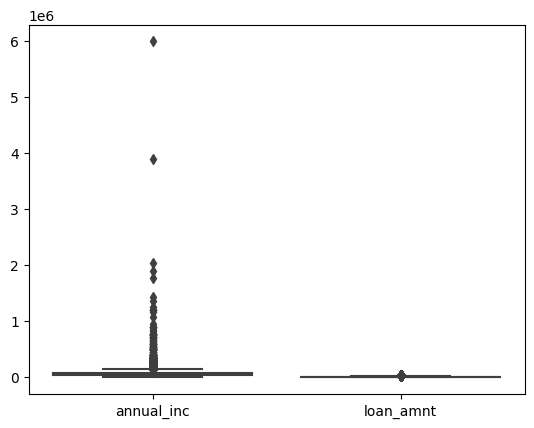

In [20]:
# Plotting the boxplots for both the columns

sns.boxplot(df[['annual_inc', 'loan_amnt']])
plt.show()

```loan_amnt``` doesn't have any outliers but ```annual_inc``` and has some outliers. So we need to check from what quantile range outliers are starting.

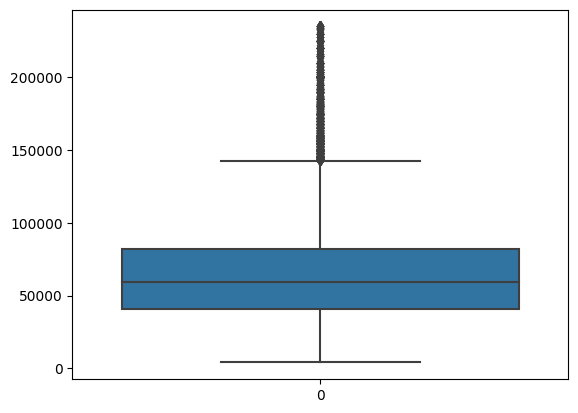

In [21]:
# Checking if outliers get removed if 99th percentile of data is considered.

data_99th_percent = df.annual_inc[df.annual_inc <= df.annual_inc.quantile(0.99)]
sns.boxplot(data_99th_percent)
plt.show()

Outliers got removed so we will consider only 99 percent of the dataset

In [22]:
# Updating the dataset and Keeping only 99 percent of the datatset
df = df[df.annual_inc <= df.annual_inc.quantile(0.99)]

In [23]:
df.shape

(37173, 17)

After performing all the cleaning processes, we are left with ```37173``` rows and ```17``` columns

### So the data cleaning is completed

# Exploratory Data Analysis

### Dervied Metrics

Date in column ```issue_d``` is not in the standard format. so splitting this column in two and removing it

In [24]:
# Splitting the column 'issue_d' in two and removing it.

df[['issue_month', 'issue_year']] = df.issue_d.str.split('-', 1, expand=True)
df = df.drop(['issue_d'], axis=1)

Lets see how many people have defaulted the loans and how many people have fully paid their loans

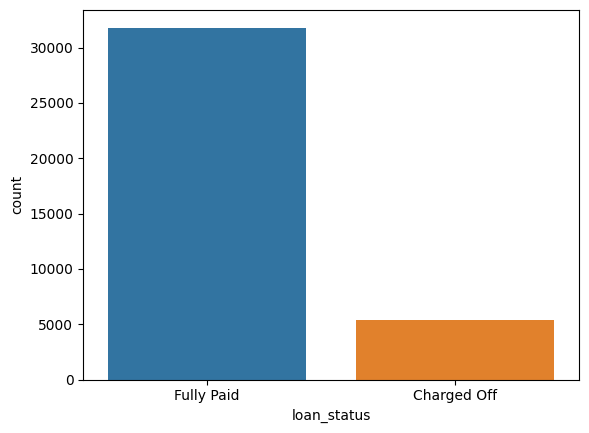

In [25]:
sns.countplot(data=df, x='loan_status')
plt.show()

In [26]:
df.loan_status.value_counts()

Fully Paid     31813
Charged Off     5360
Name: loan_status, dtype: int64

Total ```5360``` people have defaulted on their loans. So we will form the dataframe of only those records where loan status is ```Charged Off``` for the univariate analysis.

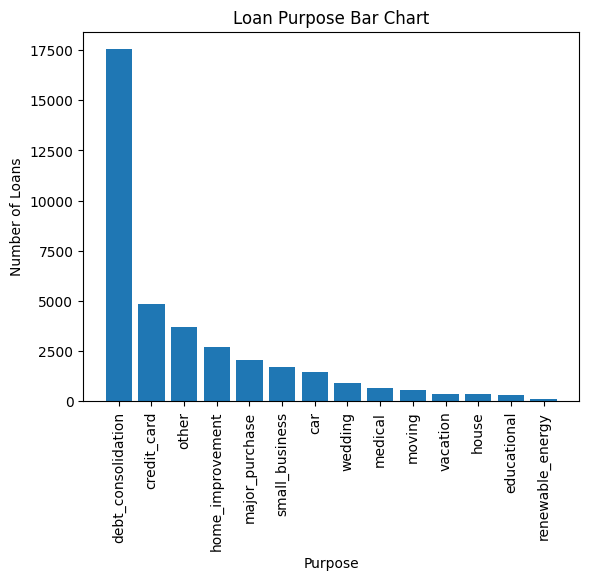

In [27]:
# Count the number of loans for each purpose
purpose_counts = df['purpose'].value_counts()

# Create a bar chart
plt.bar(purpose_counts.index, purpose_counts.values)

# Set the axis labels and title
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose Bar Chart')

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

Here we can see maximum applications are for ```debt consolidation```

## Bivariate Analysis

To figure out a rough idea about what columns are responsible for the defaults. We need to compare every column with the ratio of people who have defaulted their loans

We are calculating the default ratio using this formula.  
```default ratio = total number of charged off / charged off + fully paid```

In [28]:
# Making a function to plot charts for the wrt default ratio

def uni_plotBar(column, xTicksRot=0, bins=[], xTicksLabels=[]):
    
    if bins == []:
        grouped = df.groupby([column, 'loan_status']).size().unstack(fill_value=0)

        # Calculate the ratio of charged off loans to total loans for each home ownership category
        grouped['default_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])

        # Plot the graph
        ax = grouped['default_ratio'].plot.bar(rot=0, figsize=(8, 6))
        ax.set_title(f'Default ratio wrt {column}')
        ax.set_xlabel(column)
        ax.set_ylabel("Default ratio")
        plt.xticks(rotation=xTicksRot)
        plt.show()

    else:
        
        
        if xTicksLabels == []:
            df[f'{column}_bin'] = pd.cut(df[column], bins=bins)
        else:
            df[f'{column}_bin'] = pd.cut(df[column], bins=bins, labels=xTicksLabels)
            
            
            
            grouped = df.groupby([f'{column}_bin', 'loan_status']).size().unstack(fill_value=0)
            grouped['default_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])
                
            ax = grouped['default_ratio'].plot.bar(rot=0, figsize=(8, 6))
            ax.set_xlabel(column)
            ax.set_ylabel('Default ratio')
            ax.set_title(f'Default ratio wrt {column}')
            plt.xticks(rotation=xTicksRot)
            plt.show()

The above function takes 4 argumanets ```column name```, ```rotation Angle```, ```list of bins```, ```list of labels```.  This function will plot charts for categorical as well as continuous variables with respect to the default ratio.

### Default ratio at ```term```

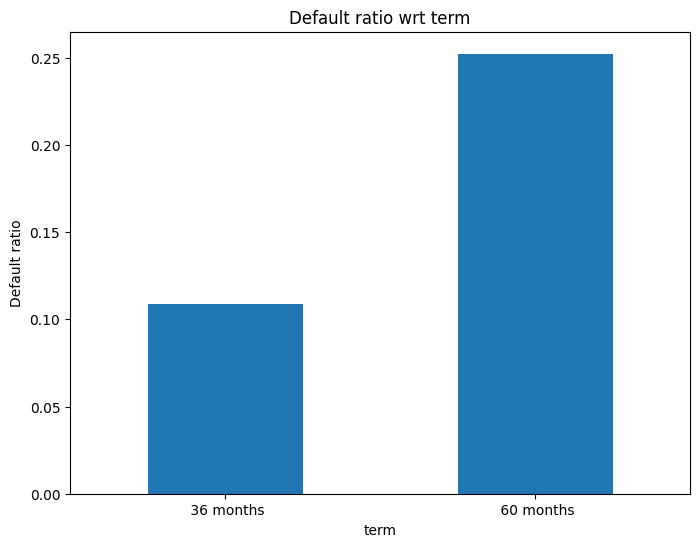

In [29]:
# Checking for column 'term'
uni_plotBar('term')

> Default rate is incresing wrt ```term```.People having a term of 60 months are having a high tendency to default.  
***```term``` ```is```  ```a potential indicator```***

### Default ratio at ```grade```

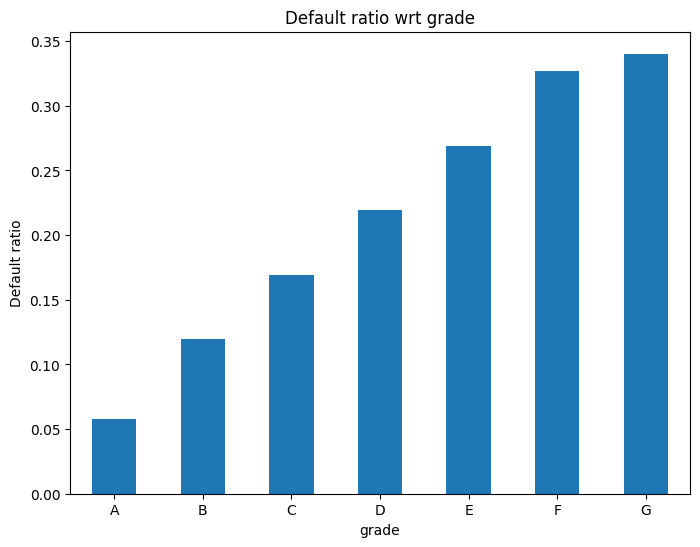

In [30]:
# Checking for column grade
uni_plotBar('grade')

> Default rate is incresing wrt ```grade```. Tendency of default is increasing with grade A to G.  
***```grade``` ```is```  ```a potential indicator```***

### Default ratio at ```sub_grade```

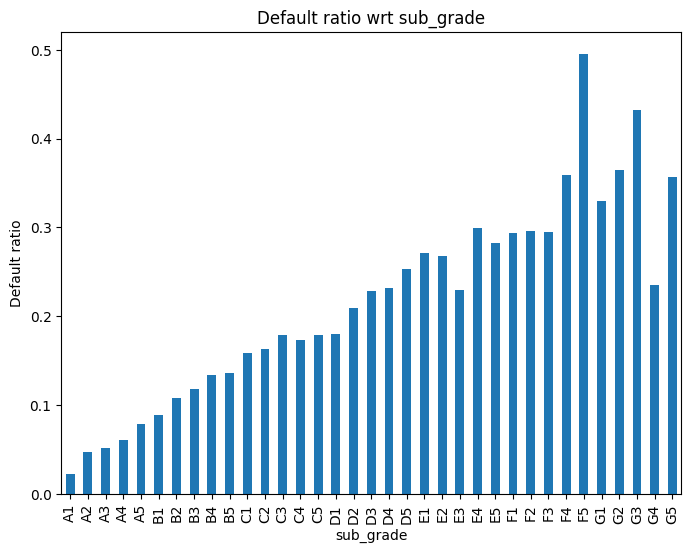

In [31]:
uni_plotBar('sub_grade', xTicksRot=90)

> Default rate is incresing wrt ```sub_grade```. Tendency of default is increasing with grade A# to G#.  
***```sub_grade``` ```is```  ```a potential indicator```***

### Default ratio at ```emp_length```

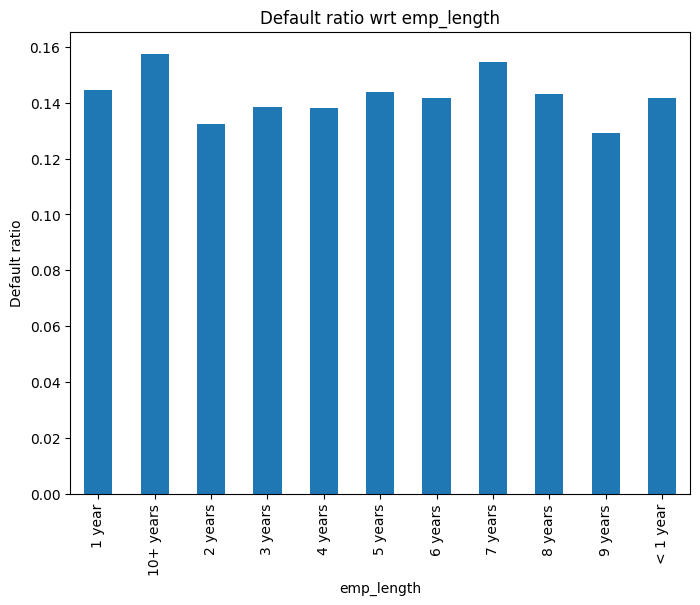

In [32]:
uni_plotBar('emp_length', xTicksRot=90)

> Default rate is incresing wrt ```emp_length```. Tendency of default is constant and does not depend on .  
***```emp_length``` ```is not```  ```a potential indicator```***

### Default ratio at ```home_ownsership```

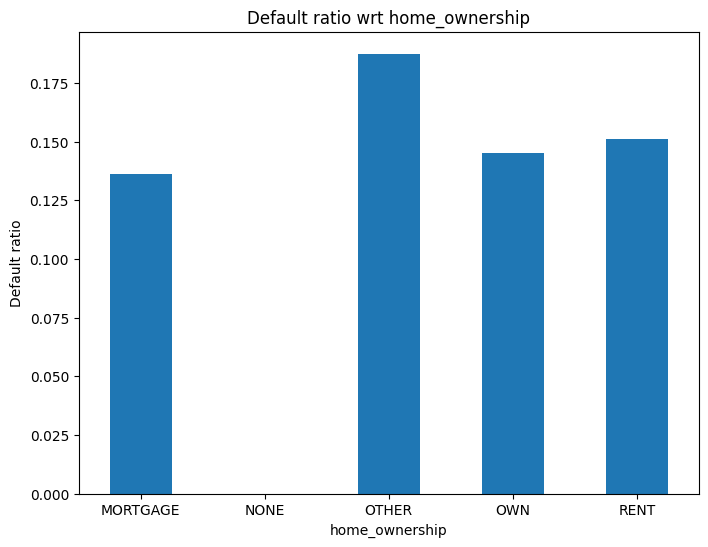

In [33]:
uni_plotBar('home_ownership')

> Default rate is highest for ***OTHER***. But there is no clue what OTHER contains  
***```home_ownsership``` ```is not```  ```a potential indicator```***

### Default ratio at ```verification_status```

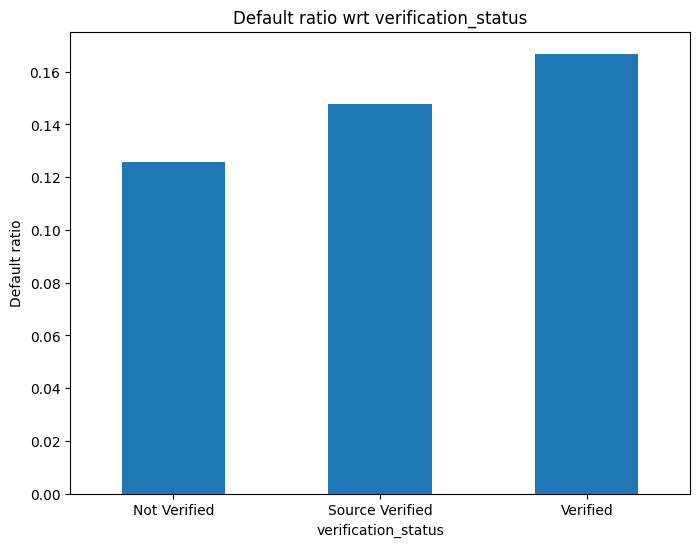

In [34]:
uni_plotBar('verification_status')

> Default rate is highest for ***Verified***.  
***```verification_status``` ```is not```  ```a potential indicator```***

### Default ratio at ```purpose```

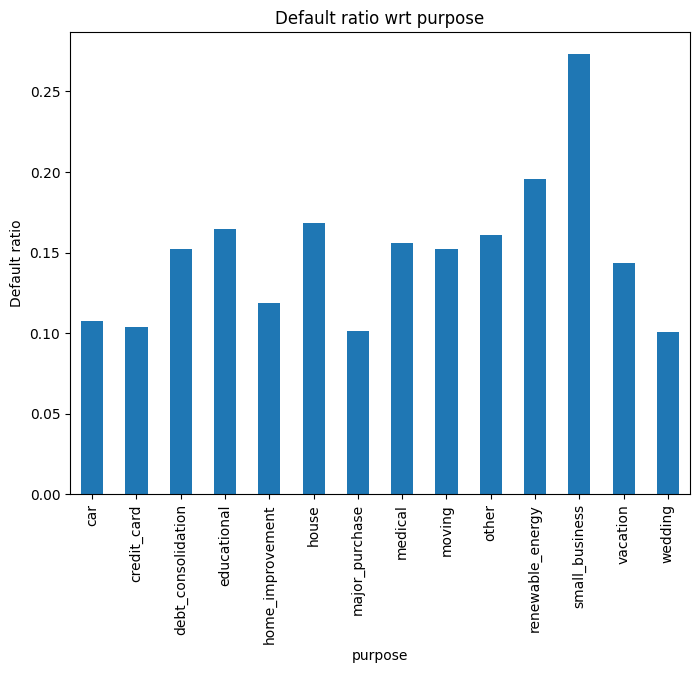

In [35]:
uni_plotBar('purpose', xTicksRot=90)

> Default rate is highest for ***small_business***.  
***```purpose``` ```is a```  ```a potential indicator```***

### Default ratio at ```annual_inc```

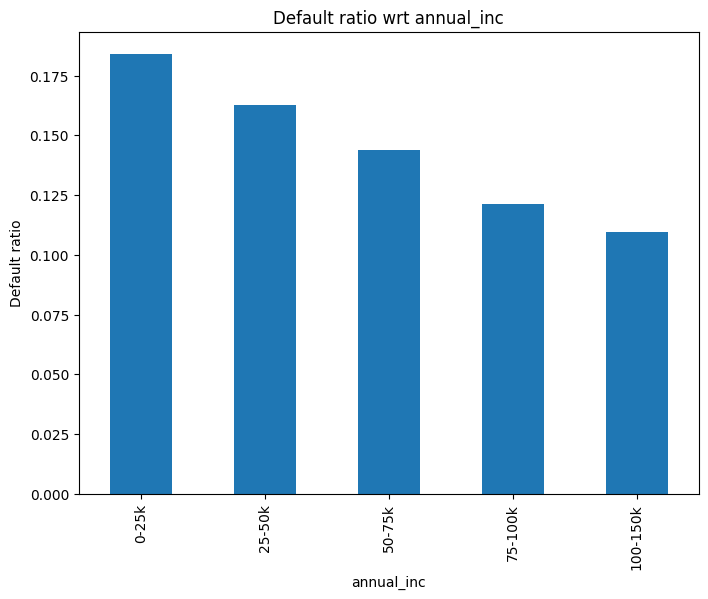

In [36]:
# Since annual_inc is a demographic variable, we need to reate bins and labels

bins = [0, 25000, 50000, 75000, 100000, 125000]
binsLabels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-150k']

uni_plotBar('annual_inc', xTicksRot=90, bins=bins, xTicksLabels=binsLabels)

> Default rate is decreasing with increase in annual income.  
***```annual_inc``` ```is a```  ```a potential indicator```***

### Default ratio at ```loan_amnt```

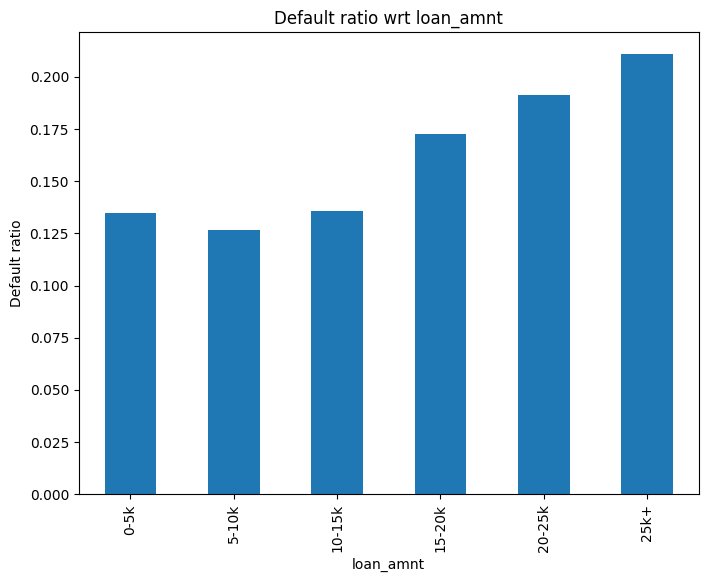

In [37]:
# Since annual_inc is a demographic variable, we need to reate bins and labels

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
binsLabels = ['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25k+']

uni_plotBar('loan_amnt', xTicksRot=90, bins=bins, xTicksLabels=binsLabels)

> Default rate is increasing with increase in loan amount.  
***```loan_amnt``` ```is a```  ```a potential indicator```***

### Default ratio at ```int_rate```

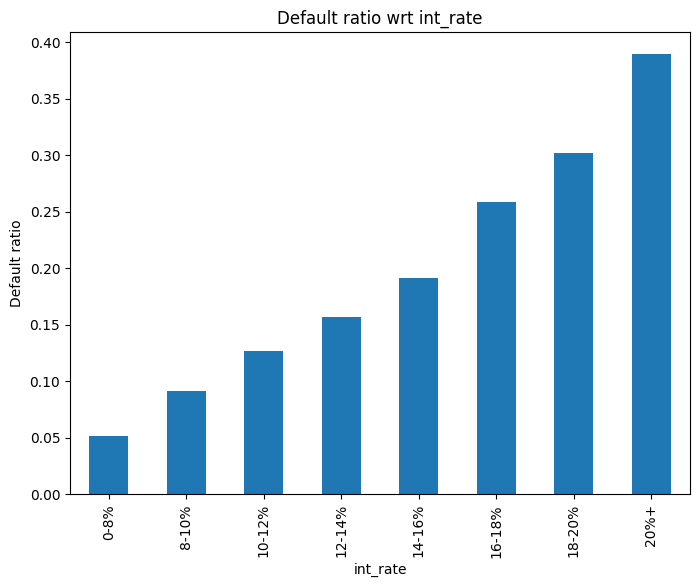

In [38]:
bins = [0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 30]
binsLabels = ['0-8%', '8-10%', '10-12%', '12-14%', '14-16%', '16-18%', '18-20%', '20%+']

uni_plotBar('int_rate', xTicksRot=90, bins=bins, xTicksLabels=binsLabels)


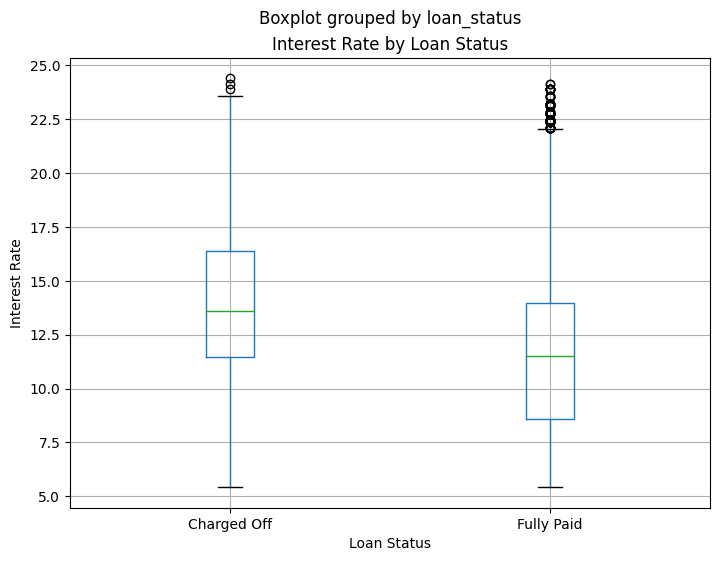

In [39]:
df.boxplot(column='int_rate', by='loan_status', figsize=(8, 6))

# Set the labels and title
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Loan Status')

# Show the plot
plt.show()

> Default rate is increasing with increase in interest rate.  
***```int_rate``` ```is a```  ```a potential indicator```***

### Default ratio at ```addr_state```

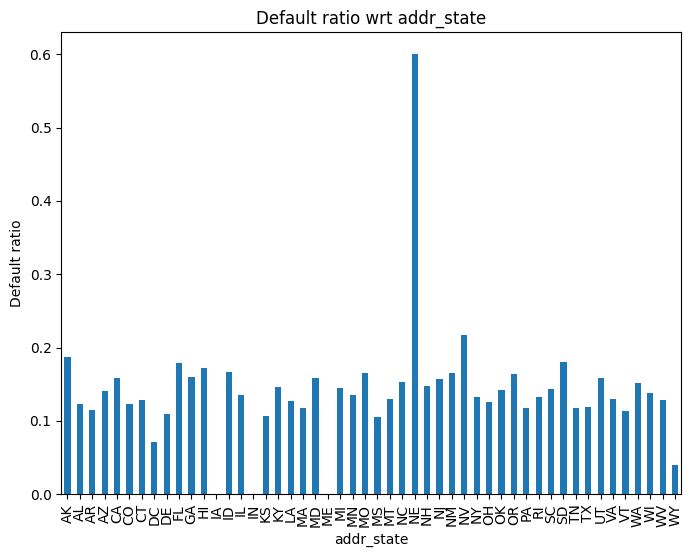

In [40]:
uni_plotBar('addr_state', xTicksRot=90)

> Default rate is highest at state ***NE***.  
***```addr_state``` ```is a```  ```a potential indicator```***

### Default ratio at ```issue_year```

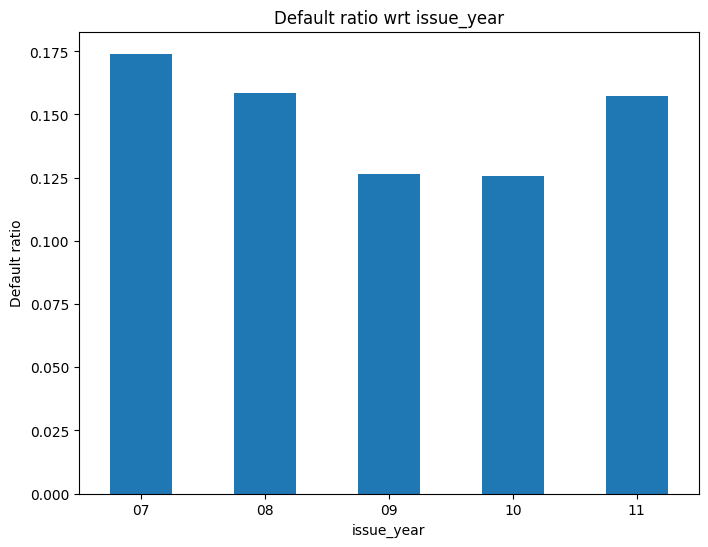

In [41]:
uni_plotBar('issue_year')

> There are no extrordinary variations in default rate wrt years. Hence no conclusion can be derived.  
***```issue_year``` ```is not```  ```a potential indicator```***

### Default ratio at ```issue_month```

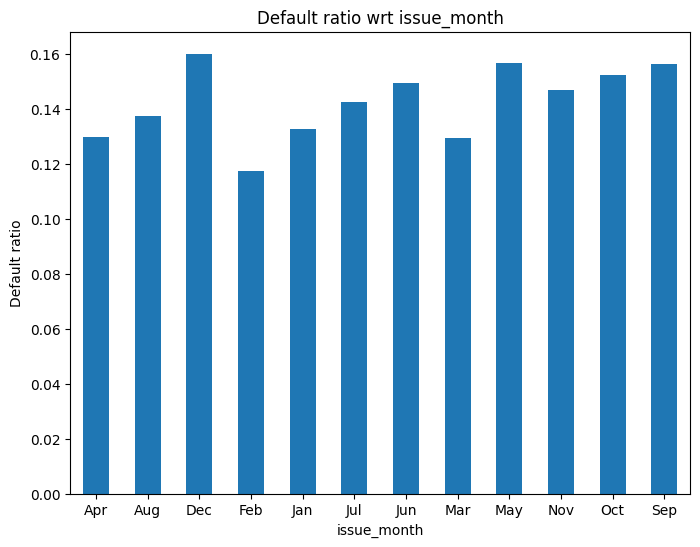

In [42]:
uni_plotBar('issue_month')

> There are no extrordinary variations in default rate wrt months. Hence no conclusion can be derived.  
***```issue_month``` ```is not```  ```potential indicator```***

### Default ratio at ```installment```

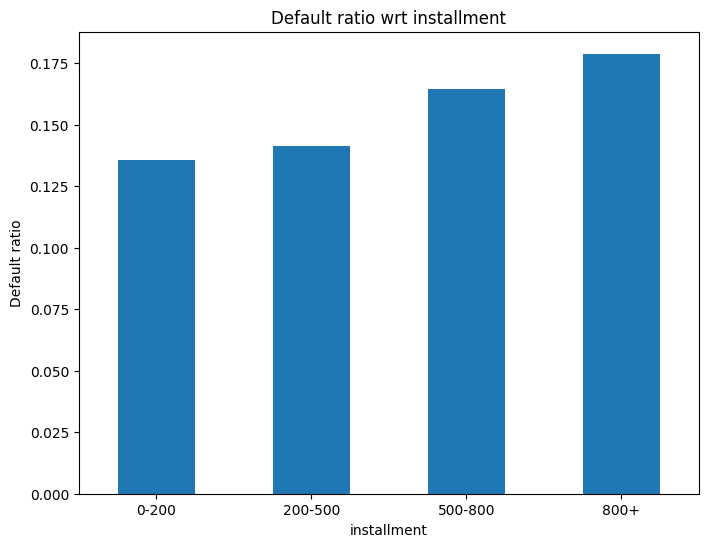

In [43]:
bins = [0, 200, 500, 800, 1500]
binsLabels = ['0-200', '200-500', '500-800', '800+']

uni_plotBar('installment', bins=bins, xTicksLabels=binsLabels)

> The default rate is increasing wrt to number of installments.  
***```installment``` ```is```  ```a potential indicator```***

### Default ratio at ```dti```

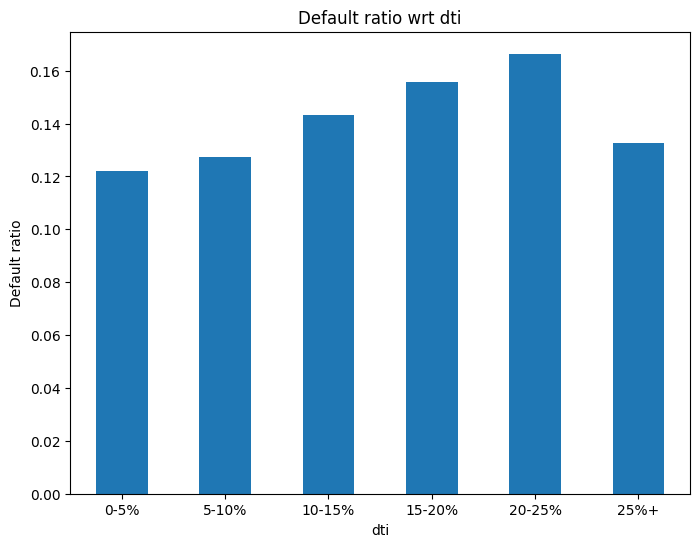

In [44]:
bins = [0, 5, 10, 15, 20, 25, 30]
binsLabels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']

uni_plotBar('dti', bins=bins, xTicksLabels=binsLabels)

> The default rate is increasing wrt to debt to income ratio.  
***```dti``` ```is```  ```a potential indicator```***

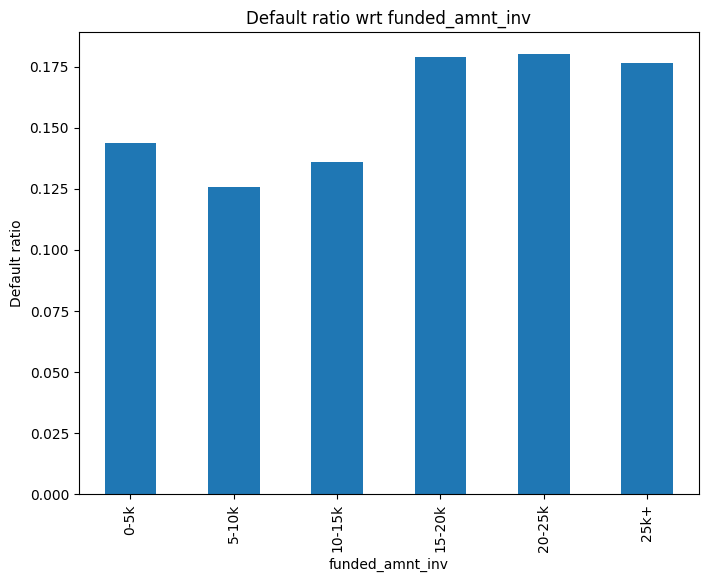

In [45]:
# Since annual_inc is a demographic variable, we need to reate bins and labels

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
binsLabels = ['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25k+']

uni_plotBar('funded_amnt_inv', xTicksRot=90, bins=bins, xTicksLabels=binsLabels)

> No such significant variations  
***```funded_amnt_inv``` ```is not```  ```a potential indicator```***

### Analysis is complete  
The columns ```term, grade, sub_grade, purpose, annual_inc, loan_amnt, int_rate, addr_state, installment, dti``` are the potential indicators.

# Observations

***The following signifacant results were noticed by performing the analysis***
* If the term of the loan is higher, (Ex. 60months) the default rate is more likely to increase. The company should be careful while approving loans with higher terms.
* The default rate will increase if we go down the grade. The default rate is lowest for grade A and the highest for grade G. Similar results are seen for the subgrades. 
* For smalll business the default rate is the highest. If a person is applying for a loan for a small busniess then that person is more likely to default.
* Default rate is increasing with the decrease in annual income. People with less annual income are more likely to default.
* Default rate is increasing with increase in loan amount. Amounts greater than 15000 are facing the highest defaults.
* Higher interet rates will alwayts increas the defaults.
* Issuing loans in state NE can be risky.
* Higher installments will increase the defaults.
* Default rate increases with increase in dti ratio.